<a href="https://colab.research.google.com/github/aditya0589/notebooks/blob/main/Deep%20Learning/ANN04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL05 Gradient Descent**


Gradient Descent is an **optimization algorithm** used to minimize a **loss function** by iteratively adjusting the parameters (weights and biases) of a neural network in the direction of **steepest decrease** of the loss.

In neural networks, we want to find parameters **θ** such that the loss function **L(θ)** is minimized.

---

## 2. Mathematical Intuition

### Objective
Given a loss function:
$$
[
L(\theta)
]
$$
we want:

$$[
\theta^* = \arg\min_{\theta} L(\theta)
]
$$

---

### Gradient Concept

The **gradient** of the loss function is a vector of partial derivatives:

\[
$$ nabla_\theta L(\theta) $$ =
\begin{bmatrix}
\frac{\partial L}{\partial \theta_1} \\
\frac{\partial L}{\partial \theta_2} \\
\vdots \\
\frac{\partial L}{\partial \theta_n}
\end{bmatrix}
\]

- The gradient points in the direction of **maximum increase**
- To minimize the loss, we move **opposite** to the gradient

---

### Update Rule

$$[
\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)
]
$$
Where:
$$ \eta \ $$ = learning rate (step size)
- $$ ( \nabla_\theta L(\theta_t) ) $$ = gradient at current parameters





---

## 7. Batch vs Stochastic Gradient Descent

| Aspect | Batch GD | Stochastic GD |
|------|----------|---------------|
| Data Used | Entire dataset | Single sample |
| Speed per update | Slow | Fast |
| Convergence | Smooth | Noisy |
| Memory usage | High | Low |
| Escapes local minima | Poor | Better |

---

## 8. Mini-Batch Gradient Descent (Practical Standard)

Uses **small batches** (e.g., 32, 64, 128 samples):

$$ [
\theta = \theta - \eta \frac{1}{B} \sum_{i=1}^{B} \nabla_\theta L(x_i, y_i)
]
$$

### Why it’s preferred:
- Balance between speed and stability
- Efficient GPU utilization
- Less noisy than SGD, faster than Batch GD




In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df[["Age", 'EstimatedSalary', "Purchased"]]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [28]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()

In [32]:
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

The below is the ANN trained using stochastic gradient descent.
Notice that we set ``batch_size = 1`` in the ``fit`` method.

In [35]:
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6972 - loss: 0.6645 - val_accuracy: 0.3625 - val_loss: 0.8119
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7363 - loss: 0.4181 - val_accuracy: 0.5500 - val_loss: 0.7311
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8473 - loss: 0.3452 - val_accuracy: 0.6125 - val_loss: 0.6519
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.3336 - val_accuracy: 0.6375 - val_loss: 0.5843
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3121 - val_accuracy: 0.6500 - val_loss: 0.5416
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.2709 - val_accuracy: 0.6875 - val_loss: 0.4769
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8607 - loss: 0.2817 - val_accuracy: 0.8000 - val_loss: 0.4354
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.2942 - val_accu

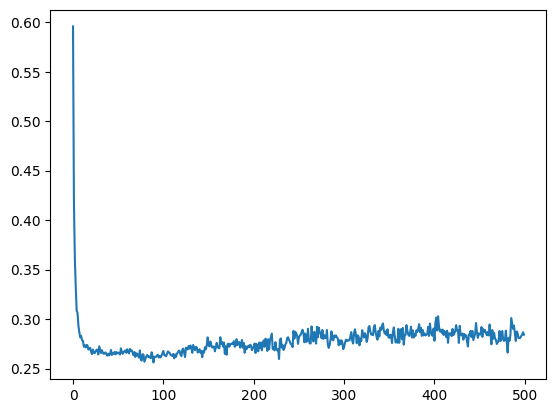

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

You notice that the curve for stochastic gradient descent is rough and zig zag in nature.

This helps to prevent being struck at local minimas and is slower but more efficient

In [37]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Batch Gradient Descent

The below is the ANN trained using batch gradient descent. Notice that we set ``batch_size = 250`` in the ``fit`` method.

In [38]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.2323 - loss: 0.7494 - val_accuracy: 0.6250 - val_loss: 0.5667
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2706 - loss: 0.7333 - val_accuracy: 0.6500 - val_loss: 0.5632
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3224 - loss: 0.7192 - val_accuracy: 0.6500 - val_loss: 0.5621
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3343 - loss: 0.7140 - val_accuracy: 0.6625 - val_loss: 0.5593
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3731 - loss: 0.7039 - val_accuracy: 0.6750 - val_loss: 0.5581
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3987 - loss: 0.6975 - val_accuracy: 0.7000 - val_loss: 0.5562
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4173 - loss: 0.6901 - val_accuracy: 0.7125 - val_loss: 0.5552
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4459 - loss: 0.6835 - val_accuracy: 0.7375 - val_loss: 0.5542

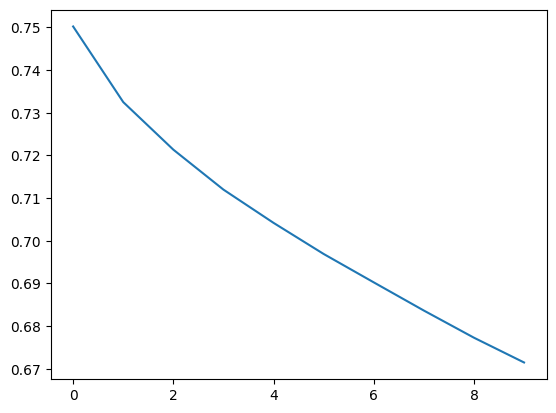

In [39]:
plt.plot(history.history['loss'])

Batch gradient descent is faster for small datasets but often not much efficient as compared to stochastic. It gives a smoother curve